# Import Libraries 


In [7]:
!pip install tensorflow

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [9]:
df=pd.read_excel('1613615-Stock_Price_data_set.xlsx',index_col='Date')
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [10]:
#Get number of rows and columns in data set
df.shape

(1009, 6)

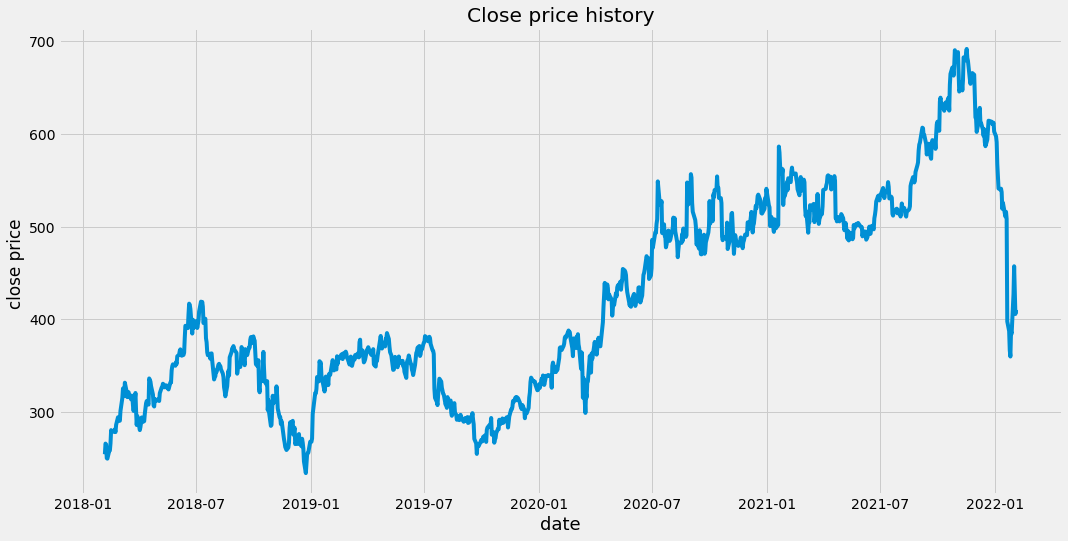

In [11]:
#visualization of the closing histry
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('date',fontsize=18)
plt.ylabel('close price ')
plt.show()

In [12]:
#create a new dataframe with only the close column
data=df.filter(['Close'])
#convert the dataframe into numpy arry
dataset=data.values
#get the number of rows to train the model
training_data_len=math.ceil(len(dataset)*0.8)
training_data_len
training_data_len

808

In [13]:
#scale the data
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.04451626],
       [0.06954849],
       [0.06701469],
       ...,
       [0.4272515 ],
       [0.37509011],
       [0.38507243]])

In [14]:
#create the training data set
#create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#split the data into x_train and y_train data sets
x_train=[]
y_train=[]

for i in range (60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09667768, 0.11369343, 0.13167034,
       0.12391599, 0.12559796, 0.12343551, 0.14672022, 0.1771914 ,
       0.19951508, 0.19064677, 0.18156003, 0.2131015 , 0.19095254,
       0.17911361, 0.19149862, 0.19049385, 0.18472731, 0.17387127,
       0.18265218, 0.18042421, 0.15906164, 0.14647998, 0.18887749,
       0.1459339 , 0.11334393, 0.13426968, 0.10137394, 0.10875693,
       0.12026823, 0.13125532, 0.12007165, 0.12243068, 0.14021101,
       0.15244317, 0.16463161, 0.16987394, 0.16142066, 0.22319301,
       0.21982915, 0.21585376, 0.20508505, 0.18525152, 0.15976057,
       0.15700838, 0.17496343, 0.17011425, 0.17164323, 0.17347804])]
[0.17360909661393864]

[array([0.04451626, 0.06954849, 0.06701469, 0.03542955, 0.03405342,
       0.05257641, 0.05327534, 0.0701601 , 0.10133021, 0.09750767,
       0.09757319, 0.10301218, 0.09

In [15]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [16]:
#reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(748, 60, 1)

In [17]:
#build the LSTM model
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [18]:
#compile the model
model.compile(optimizer='adam',loss='mean_squared_error')

In [19]:
#train the model
model.fit(x_train,y_train,batch_size=1,epochs=1)

748/748 [==============================] - 35s 37ms/step - loss: 0.0039


In [20]:
#create the testiong data set
#create the new arry containing scaled values from index 
test_data=scaled_data[training_data_len-60:,:]
#create the data set x_test and y_test
x_test=[]
y_test=dataset[training_data_len:, :]
for i in range (60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [21]:
#convert data into numpy
x_test=np.array(x_test)

In [22]:
#reshape the data
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [23]:
#get the model predicted values
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

7/7 [==============================] - 2s 29ms/step


array([[544.38666],
       [539.58795],
       [534.2168 ],
       [529.5256 ],
       [525.17456],
       [521.51184],
       [518.76306],
       [517.1312 ],
       [515.79596],
       [514.2001 ],
       [511.98685],
       [510.00726],
       [508.71066],
       [506.29517],
       [504.3575 ],
       [501.89258],
       [499.57373],
       [498.15106],
       [496.8866 ],
       [495.58484],
       [494.51822],
       [494.93817],
       [495.67908],
       [496.973  ],
       [498.25967],
       [499.51282],
       [500.76062],
       [501.7844 ],
       [502.25833],
       [502.43576],
       [501.55072],
       [500.7304 ],
       [500.00046],
       [499.17975],
       [497.79688],
       [496.41403],
       [495.29575],
       [495.4282 ],
       [495.41684],
       [495.39954],
       [495.91898],
       [496.86407],
       [497.58032],
       [499.20267],
       [501.4518 ],
       [504.2763 ],
       [507.92874],
       [512.1662 ],
       [516.31396],
       [519.5297 ],


In [24]:
# get the root mean squared error(RMSE)
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.412755384202038

C:\Users\pramo\AppData\Local\Temp\ipykernel_7940\2617299793.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions']=predictions


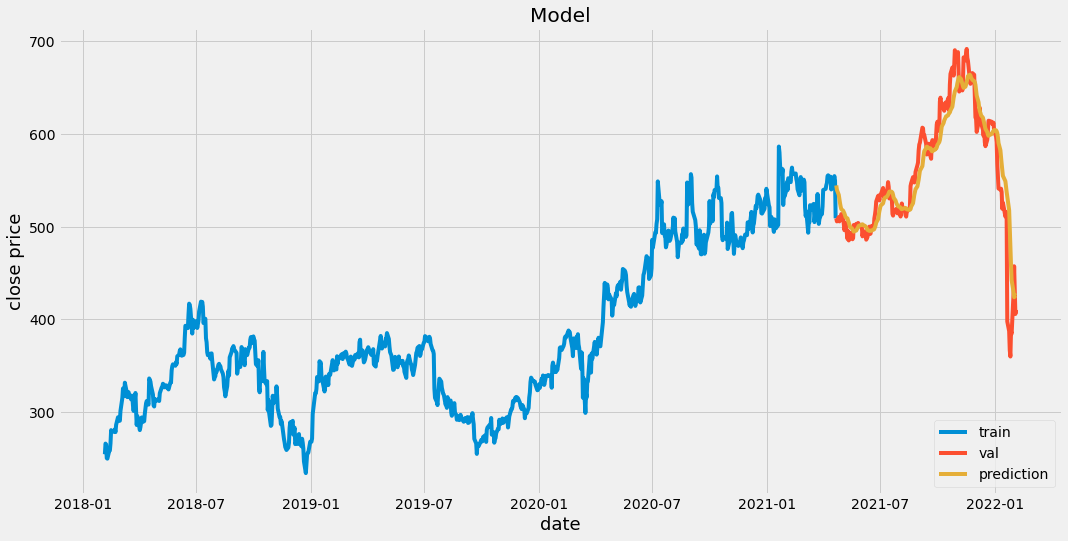

In [25]:
#plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions']=predictions
#visualization of data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('date',fontsize=18)
plt.ylabel('close price',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','predictions']])
plt.legend(['train','val','prediction'],loc='lower right')
plt.show()

In [26]:
# show the valid and actual prices
valid

,Close,predictions
Date,,
2021-04-22,508.779999,544.386658
2021-04-23,505.549988,539.587952
2021-04-26,510.299988,534.216797
2021-04-27,505.549988,529.525574
2021-04-28,506.519989,525.174561
...,...,...
2022-01-31,427.140015,429.565735
2022-02-01,457.130005,423.688477
2022-02-02,429.480011,424.394684
